# IPL Score Prediction

### Cleaning the Data

In [24]:
# Importing the libraries and setting global parameters for plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [25]:
# Read the data file
df_matches = pd.read_csv('IPL Matches.csv')

In [26]:
# View first 5 matches
df_matches.head()

id  season        city        date                  team1  \
0  60    2008   Bangalore  18-04-2008  Kolkata Knight Riders   
1  61    2008  Chandigarh  19-04-2008    Chennai Super Kings   
2  62    2008       Delhi  19-04-2008       Rajasthan Royals   
3  63    2008      Mumbai  20-04-2008         Mumbai Indians   
4  64    2008     Kolkata  20-04-2008        Deccan Chargers   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1              Kings XI Punjab          Chennai Super Kings           bat   
2             Delhi Daredevils             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4        Kolkata Knight Riders              Deccan Chargers           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0        Kolkata Knight Riders          140   
1  normal           0          Chennai Super Kings           33   
2  normal           0             Delhi Daredevils            0   
3  normal           0  Royal Challengers Bangalore            0   
4  normal           0        Kolkata Knight Riders            0   

   win_by_wickets player_of_match                                       venue  \
0               0     BB McCullum                       M Chinnaswamy Stadium   
1               0      MEK Hussey  Punjab Cricket Association Stadium, Mohali   
2               9     MF Maharoof                            Feroz Shah Kotla   
3               5      MV Boucher                            Wankhede Stadium   
4               5       DJ Hussey                                Eden Gardens   

     umpire1         umpire2 umpire3  
0  Asad Rauf     RE Koertzen     NaN  
1  MR Benson      SL Shastri     NaN  
2  Aleem Dar  GA Pratapkumar     NaN  
3   SJ Davis       DJ Harper     NaN  
4  BF Bowden     K Hariharan     NaN

In [27]:
# Find the winners for each season

df_wins = df_matches.groupby(["season","winner"]).size()
df_wins = df_wins.reset_index(name='No.of games won')
df_wins.head()

season                 winner  No.of games won
0    2008    Chennai Super Kings                9
1    2008        Deccan Chargers                2
2    2008       Delhi Daredevils                7
3    2008        Kings XI Punjab               10
4    2008  Kolkata Knight Riders                6

In [28]:
# Total Wins in All seasons by Team

df_totalwins = df_wins.groupby(["winner"]).sum("No.of games won")
df_totalwins = df_totalwins.reset_index()
df_totalwins = df_totalwins.filter(["winner","No.of games won"],axis=1).sort_values(by="No.of games won",ascending=False)
df_totalwins

winner  No.of games won
8                Mumbai Indians              109
0           Chennai Super Kings              100
7         Kolkata Knight Riders               92
13  Royal Challengers Bangalore               84
5               Kings XI Punjab               82
10             Rajasthan Royals               75
3              Delhi Daredevils               67
14          Sunrisers Hyderabad               58
1               Deccan Chargers               29
4                 Gujarat Lions               13
9                 Pune Warriors               12
2                Delhi Capitals               10
11       Rising Pune Supergiant               10
6          Kochi Tuskers Kerala                6
12      Rising Pune Supergiants                5

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Sunrisers Hyderabad'),
  Text(8, 0, 'Deccan Chargers'),
  Text(9, 0, 'Gujarat Lions'),
  Text(10, 0, 'Pune Warriors'),
  Text(11, 0, 'Delhi Capitals'),
  Text(12, 0, 'Rising Pune Supergiant'),
  Text(13, 0, 'Kochi Tuskers Kerala'),
  Text(14, 0, 'Rising Pune Supergiants')])

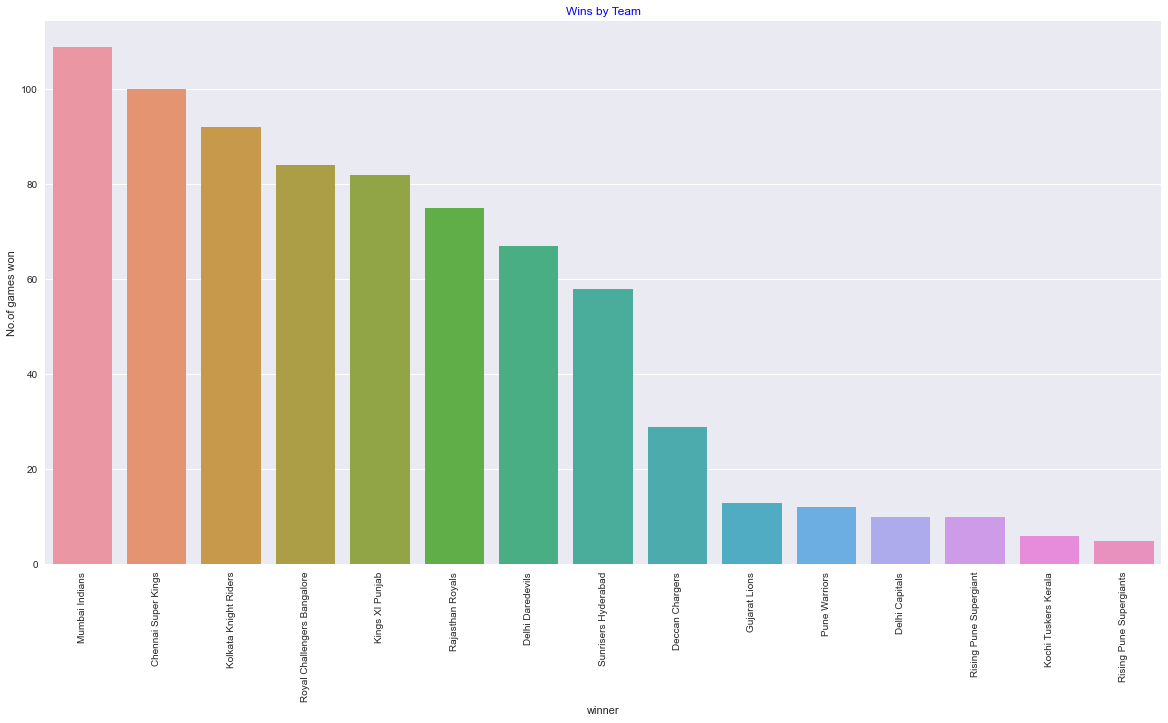

In [29]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Wins by Team",color='b')

# Create the bar chart
sns.barplot(x="winner",y="No.of games won",data=df_totalwins)

# Add label for vertical axis
plt.xticks(rotation = 'vertical')

### Find Teams who won toss and won the match

In [30]:
df_tosswinners = df_matches[df_matches["toss_winner"] == df_matches["winner"]]

In [32]:
df_tosswinners["toss_decision"].value_counts()

field    259
bat      134
Name: toss_decision, dtype: int64

#### As observed from above result, majority of toss winners took field as an option and won the match.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Rajasthan Royals'),
  Text(11, 0, 'Rising Pune Supergiant'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Royal Challengers Bangalore'),
  Text(14, 0, 'Sunrisers Hyderabad')])

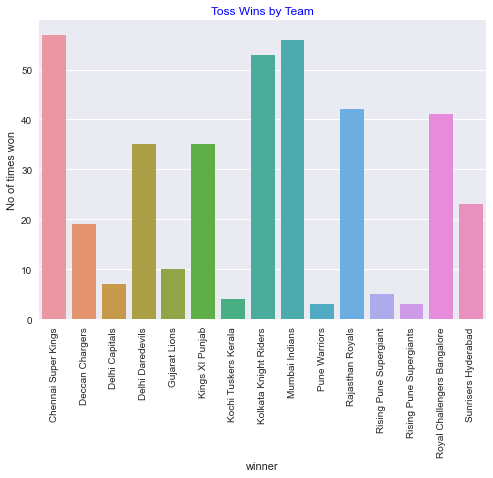

In [42]:
df_tosswinners_teams = df_tosswinners.groupby(["winner"]).size()
df_tosswinners_teams = pd.DataFrame(df_tosswinners_teams).reset_index()
df_tosswinners_teams.columns = ["winner","No of times won"]

# Plotting the toss and match winners

plt.title("Toss Wins by Team",color='b',)
sns.barplot(x="winner",y="No of times won",data=df_tosswinners_teams)
plt.xticks(rotation = 'vertical')

### Find the Training Data to Build Model

In [54]:
# Removing the null values from columns

df_matches = df_matches.dropna(subset=["city","winner"],how='any')
df_matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            627
dtype: int64

#### Removing the target variables and features that are not usefull

In [105]:
X = df_matches.drop(["id","date","winner","win_by_runs","win_by_wickets",
                     "result","season","dl_applied",
                     "player_of_match","umpire1","umpire2","umpire3"],axis=1)
y = df_matches["winner"]
X

city                  team1                        team2  \
0        Bangalore  Kolkata Knight Riders  Royal Challengers Bangalore   
1       Chandigarh    Chennai Super Kings              Kings XI Punjab   
2            Delhi       Rajasthan Royals             Delhi Daredevils   
3           Mumbai         Mumbai Indians  Royal Challengers Bangalore   
4          Kolkata        Deccan Chargers        Kolkata Knight Riders   
..             ...                    ...                          ...   
751         Mumbai  Kolkata Knight Riders               Mumbai Indians   
752        Chennai    Chennai Super Kings               Mumbai Indians   
753  Visakhapatnam    Sunrisers Hyderabad               Delhi Capitals   
754  Visakhapatnam         Delhi Capitals          Chennai Super Kings   
755      Hyderabad         Mumbai Indians          Chennai Super Kings   

                     toss_winner toss_decision  \
0    Royal Challengers Bangalore         field   
1            Chennai Super Kings           bat   
2               Rajasthan Royals           bat   
3                 Mumbai Indians           bat   
4                Deccan Chargers           bat   
..                           ...           ...   
751               Mumbai Indians         field   
752          Chennai Super Kings           bat   
753               Delhi Capitals         field   
754          Chennai Super Kings         field   
755               Mumbai Indians           bat   

                                          venue  
0                         M Chinnaswamy Stadium  
1    Punjab Cricket Association Stadium, Mohali  
2                              Feroz Shah Kotla  
3                              Wankhede Stadium  
4                                  Eden Gardens  
..                                          ...  
751                            Wankhede Stadium  
752                   M. A. Chidambaram Stadium  
753                            ACA-VDCA Stadium  
754                            ACA-VDCA Stadium  
755          Rajiv Gandhi Intl. Cricket Stadium  

[745 rows x 6 columns]

In [106]:
from sklearn.model_selection import train_test_split

# Converting the text inputs to numerical
X = pd.get_dummies(X)

# Random seed
np.random.seed(42)

# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.head()

city_Abu Dhabi  city_Ahmedabad  city_Bangalore  city_Bengaluru  \
44                0               0               1               0   
70                0               0               0               0   
164               0               0               0               0   
690               0               0               0               0   
266               0               0               1               0   

     city_Bloemfontein  city_Cape Town  city_Centurion  city_Chandigarh  \
44                   0               0               0                0   
70                   0               1               0                0   
164                  0               0               0                0   
690                  0               0               0                0   
266                  0               0               0                0   

     city_Chennai  city_Cuttack  ...  \
44              0             0  ...   
70              0             0  ...   
164             1             0  ...   
690             0             0  ...   
266             0             0  ...   

     venue_Saurashtra Cricket Association Stadium  \
44                                              0   
70                                              0   
164                                             0   
690                                             0   
266                                             0   

     venue_Sawai Mansingh Stadium  \
44                              0   
70                              0   
164                             0   
690                             0   
266                             0   

     venue_Shaheed Veer Narayan Singh International Stadium  \
44                                                   0        
70                                                   0        
164                                                  0        
690                                                  0        
266                                                  0        

     venue_Sharjah Cricket Stadium  venue_Sheikh Zayed Stadium  \
44                               0                           0   
70                               0                           0   
164                              0                           0   
690                              0                           0   
266                              0                           0   

     venue_St George's Park  venue_Subrata Roy Sahara Stadium  \
44                        0                                 0   
70                        0                                 0   
164                       0                                 0   
690                       0                                 0   
266                       0                                 0   

     venue_SuperSport Park  \
44                       0   
70                       0   
164                      0   
690                      0   
266                      0   

     venue_Vidarbha Cricket Association Stadium, Jamtha  \
44                                                   0    
70                                                   0    
164                                                  0    
690                                                  0    
266                                                  0    

     venue_Wankhede Stadium  
44                        0  
70                        0  
164                       0  
690                       0  
266                       0  

[5 rows x 119 columns]

In [107]:
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter=20000)

# Fit the Linear model
clf.fit(X_train,y_train)

# Check the model score
clf.score(X_test,y_test)

0.5302013422818792

**Since model score is very low changing the model to Random Forest**

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Random seed
np.random.seed(42)

# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf_rf = RandomForestClassifier(n_estimators=2000)

# Fit the Linear model
clf_rf.fit(X_train,y_train)

# Check the model score
clf_rf.score(X_test,y_test)

0.5771812080536913

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Checking the cross-validation score

clf = RandomForestClassifier(n_estimators=120, random_state=42)
cross_val_score(clf, X_train, y_train, cv=5).mean()

C:\Users\Ravi Puvvula\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


0.5419747899159664

In [110]:
# create the grid
n_estimators = [200,300,350,400,450]
max_depth = [None,20,30,40,50]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

# create the default model
clf_rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=clf_rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [111]:
grid_result.best_score_

0.5503866132006836

In [112]:
grid_result.best_estimator_

RandomForestClassifier(n_estimators=350, random_state=42)

### Creating Model with best parameters obtained from grid search Cv

In [113]:
clf_rf = RandomForestClassifier(max_depth=20, n_estimators=350, random_state=42)

# Fit the Linear model
clf_rf.fit(X_train,y_train)

# Check the model score
clf_rf.score(X_test,y_test)

0.5369127516778524

**Model score is still near 50%. Trying with Logistic Regression**

In [114]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# Fit the Linear model
clf.fit(X_train,y_train)

# Check the model score
clf.score(X_test,y_test)


0.5436241610738255

In [115]:
# Create first pipeline for base without reducing features.

from sklearn.pipeline import Pipeline

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Ravi Puvvula\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [116]:
best_clf.score(X_test,y_test)

0.5637583892617449